<a href="https://colab.research.google.com/github/harvard-ml-courses/a-cs281-demo/blob/master/02_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 - Distributions

In [0]:
!pip install -qU plotly torch daft
!rm -fr start; git clone --single-branch -b demos2018 -q https://github.com/harvard-ml-courses/cs281-demos start; cp -f start/cs281.py cs281.py

In [0]:
# Pytorch and Pytorch distributions
import torch
import torch.distributions as ds

# Plot library
from plotly.offline import iplot
import plotly.graph_objs as go
import cs281

# Graphical model drawing library
import daft

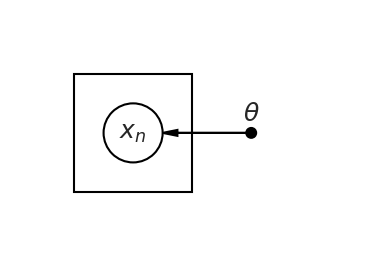

In [0]:
pgm = daft.PGM([3, 2])
pgm.add_node(daft.Node("x", "$x_n$", 1, 1))
pgm.add_node(daft.Node("theta", r"$\theta$", 2, 1, fixed=True))
pgm.add_edge("theta", "x")
pgm.add_plate(daft.Plate([0.5, 0.5, 1, 1], ""))
pgm.render();pgm.figure.dpi=150

$$x \sim {\cal N}(0, \sigma^2)$$ 

In [0]:
#ds.Normal

In [0]:
sigma = 1
# Be careful. takes in stddev
normal = ds.Normal(0, sigma)
x = torch.linspace(-5, 5)

# Density.
y = normal.log_prob(x).exp()

# CDF.
y2 = normal.cdf(x)
iplot(cs281.plot(x, y) + cs281.plot(x, y2))

In [0]:
# Monte-Carlo Sampling from Bernoulli (random walk)
p_x = ds.Bernoulli(0.3)
s = p_x.sample(torch.Size([3, 1000]))
x = torch.arange(1, 1001)
y = s.cumsum(1) / torch.arange(1000).float()

iplot(cs281.plot(x, y[0]) + cs281.plot(x, y[1]) + cs281.plot(x, y[2]))

In [0]:
m = ds.OneHotCategorical(torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]))
empirical = ds.OneHotCategorical(torch.tensor([ 0., 1., 0, 0. ]))

In [0]:
b = go.Bar(dict(y = torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]).numpy(), x=["a", "b", "c", "d"] ))
y = m.sample(torch.Size([100])).mean(0)
c = go.Bar(dict(y = y.numpy(), x=["a", "b", "c", "d"] ))
iplot([b, c])

In [0]:
ds.Bernoulli(1.2).sample()

RuntimeError: ignored

In [0]:
dv1 = torch.tensor([0.4, 0.5, 0.6], requires_grad=True)
p = ds.Bernoulli(dv1)

In [0]:
p.sample()

tensor([1., 0., 0.])